In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.18.1
pandas 0.22.0
sklearn 0.19.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [6]:
print(np.max(x_train), np.min(x_train))

255 0


In [14]:
# 归一化
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler
# x_train: [None, 28, 28] -> [None, 784]
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [16]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [17]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布 x = [x1, x2, x3],
#     y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
# 如果 y 不是一个向量用 loss = categorial_crossentropy, 如果 y 是一个向量用 loss = categorial_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [18]:
# 开启训练
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.5349 - accuracy: 0.8125 - val_loss: 0.4190 - val_accuracy: 0.8518
Epoch 2/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3859 - accuracy: 0.8604 - val_loss: 0.3800 - val_accuracy: 0.8656
Epoch 3/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3492 - accuracy: 0.8729 - val_loss: 0.3545 - val_accuracy: 0.8742
Epoch 4/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3242 - accuracy: 0.8814 - val_loss: 0.3343 - val_accuracy: 0.8796
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3054 - accuracy: 0.8891 - val_loss: 0.3182 - val_accuracy: 0.8830
Epoch 6/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.2899 - accuracy: 0.8945 - val_loss: 0.3240 - val_accuracy: 0.8816
Epoch 7/10
55000/55000 [=============================

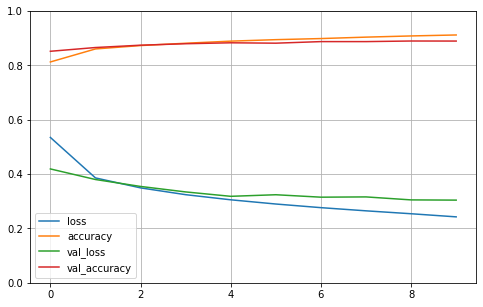

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    
plot_learning_curves(history)

In [20]:
# 测试集指标评估
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33256025265455247, 0.8823]